# Assignment 3
Seth Spire
### Due 9/21. Do four of five.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [3]:
nhanes_df = pd.read_csv('nhanes_data_17_18.csv', low_memory=False)
nhanes_meta_df = pd.read_csv('nhanes_meta_17_18.csv', low_memory=False)
nhanes_df.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(nhanes_df['EverToldYouHadCancerOrMalignancy'].isna().value_counts(normalize=True))
print()
print(nhanes_df['SmokedAtLeast100CigarettesInLife'].isna().value_counts(normalize=True))

EverToldYouHadCancerOrMalignancy
False    0.629094
True     0.370906
Name: proportion, dtype: float64

SmokedAtLeast100CigarettesInLife
False    0.661367
True     0.338633
Name: proportion, dtype: float64


The column EverToldYouHadCancerOfMalignancy has about 37% of values missing. The column SmokedAtLeast100CigarettesInLife has about 34% of values missing.

In [5]:
recoded_q1_df = nhanes_df.copy()[['EverToldYouHadCancerOrMalignancy', 'SmokedAtLeast100CigarettesInLife']].replace({
    1.0: True,
    0.0: False
})
cancer_smoked_crosstab = pd.crosstab(recoded_q1_df['EverToldYouHadCancerOrMalignancy'], recoded_q1_df['SmokedAtLeast100CigarettesInLife'])
cancer_smoked_crosstab


SmokedAtLeast100CigarettesInLife,False,True
EverToldYouHadCancerOrMalignancy,,
False,2784,1928
True,272,279


In [6]:
pd.crosstab(recoded_q1_df['EverToldYouHadCancerOrMalignancy'], recoded_q1_df['SmokedAtLeast100CigarettesInLife'], normalize='columns')

SmokedAtLeast100CigarettesInLife,False,True
EverToldYouHadCancerOrMalignancy,,
False,0.910995,0.873584
True,0.089005,0.126416


This data shows approximately a 3.7% increase in whether or not one has been told they ever had cancer or malignancy if they had smoked at least 100 cigarettes in their life. Whether or not this difference is statistically significant would require further testing, likely a Chi Squared test if I remember right.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [7]:
conditioner = 'HaveLittleInterestInDoingThings'
numerical_var = 'SleepHoursWeekdaysOrWorkdays'

recoded_q2_df = nhanes_df.copy()[[numerical_var, conditioner]]
recoded_q2_df[conditioner] = recoded_q2_df[conditioner].replace({
    0: "Not at all",
    1: "Several days",
    2: "More than half the days",
    3: "Nearly every day"
})

print(recoded_q2_df[numerical_var].isna().value_counts(normalize=True))
print()
print(recoded_q2_df[conditioner].isna().value_counts(normalize=True))
recoded_q2_df[conditioner].value_counts()

SleepHoursWeekdaysOrWorkdays
False    0.69125
True     0.30875
Name: proportion, dtype: float64

HaveLittleInterestInDoingThings
False    0.607937
True     0.392063
Name: proportion, dtype: float64


HaveLittleInterestInDoingThings
Not at all                 3792
Several days                816
More than half the days     280
Nearly every day            198
Name: count, dtype: int64

NOTE: I am like 99% I recoded HaveLittleInterestInDoingThings correctly but that specific info is annoyingly not exactly in the meta file as I think it should be. Found this on the CDC website: (https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/DPQ_J.htm)

After recoding, HaveLittleInterestInDoingThings is missing about 39.2% of values, while SleepHoursWeekdaysOrWorkdays is missing around 30.9%.

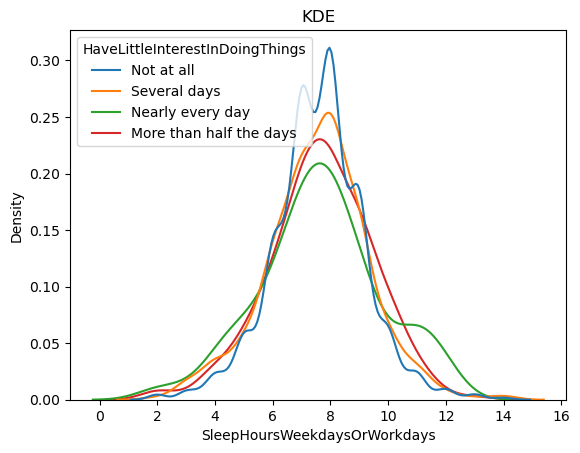

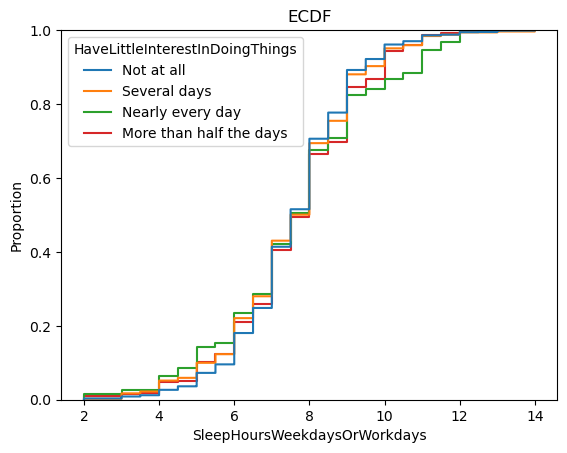

SleepHoursWeekdaysOrWorkdays            \
                                                       count      mean   
HaveLittleInterestInDoingThings                                          
More than half the days                                277.0  7.655235   
Nearly every day                                       188.0  7.654255   
Not at all                                            3774.0  7.597244   
Several days                                           811.0  7.548089   

                                                                     
                                      std  min  25%  50%  75%   max  
HaveLittleInterestInDoingThings                                      
More than half the days          1.804107  2.0  6.5  8.0  9.0  13.0  
Nearly every day                 2.121354  2.0  6.5  7.5  9.0  12.0  
Not at all                       1.582882  2.0  7.0  7.5  8.5  14.0  
Several days                     1.767374  2.0  6.5  7.5  8.5  14.0

In [8]:
sns.kdeplot(data=recoded_q2_df, x=numerical_var, hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot(data=recoded_q2_df, x=numerical_var, hue=conditioner).set(title='ECDF')
plt.show()
recoded_q2_df.loc[:,['SleepHoursWeekdaysOrWorkdays', conditioner]].groupby(conditioner).describe()

The mean sleep hours on weekdays/workdays does not seems signficiantly different for the various groupings for HaveLittleInterestInDoingThings (ranging from 7.55 for "Several Days" to 7.66 for "More than half the days") but we would need to run tests to know for sure. The general shapes of the distributions is similar, looking largley normally distributed. However, how wide the distributions are does vary, with an increase in the number of days not feeling interested in doing things having a wider distribution and larger standard deviation. Those who are not interested in doing things most days also has an increase instances near 10-12 sleep hours, potentially meaning those getting that abnormally large amount of sleep are those who frequently show little interest in doing things, a potential sign of depression. But would all require further testing to confirm.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator:

$$
\hat{y}_{N,h}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}
$$

- *This can be shown by taking the derivative of the MSE and setting it to zero. This minimizes the MSE and is show below to equal the LCLS:*
![alt text](20250919_093944-1.jpg)

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [76]:

def silverman_plug_in_bandwidth(data):
    iqr = np.quantile(data, .75) - np.quantile(data, .25)
    return 0.9 * min(np.std(data), iqr/1.34) * len(data) **(-0.2)

def uniform_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1/2) * (np.abs(u) <= 1)

def gaussian_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1/np.sqrt(2*np.pi)) * np.exp(-(u**2)/2)

def triangular_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1-np.abs(u)) * (np.abs(u) <= 1)

def epanechnikov_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (3/4) * (1 - u**2) * (np.abs(u) <= 1)

def lcls(x: np.ndarray, y: np.ndarray, h: float = None, kernel=uniform_kernel, x_label='x', y_label='y'):
    # grid is sorted unique values of x
    grid = np.sort(np.unique(x)) 

    # get bandwidth if not provided
    if h is None:
        h = silverman_plug_in_bandwidth(x)

    # Compute kernel:
    k_matrix = kernel(x.reshape(-1,1), grid.reshape(1, -1), h)

    # Compute LCLS estimator:
    numerator = y@k_matrix # Compute the numerator
    denominator = np.sum(k_matrix, axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    sns.scatterplot(y=y, x=x, alpha=.1)
    sns.lineplot(x=grid,y=y_hat, color='orange').set(xlabel=x_label, ylabel=y_label)

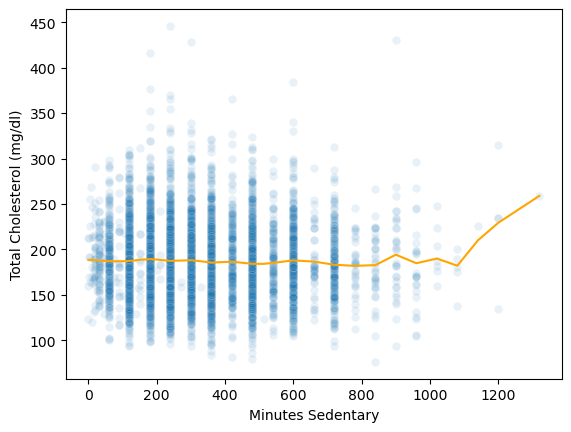

In [79]:
blood_levels = nhanes_df[['MinutesSedentaryActivity', 'TotalCholesterolMgdl']].replace({9999: np.nan}).dropna()
blood_lead = blood_levels['MinutesSedentaryActivity'].values
blood_mercury = blood_levels['TotalCholesterolMgdl'].values
plot = lcls(blood_lead, blood_mercury, kernel=gaussian_kernel, x_label='Minutes Sedentary', y_label='Total Cholesterol (mg/dl)')


> *Looking at the relationship between sedentary minutes and total cholesterol level, the cholesterol level is pretty level/consitent from 0 to 1100 minutes sedentary. It spikes after that but there are very few data points above 1000 so this is probably not a significant finding. Overall, this does not seem to show a meaningful correlation between sedentary minutes and cholesterol level.*

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome